In [19]:
from PIL import Image, ImageDraw
from ipywidgets import interact
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'/Users/malamapono/opt/anaconda3/envs/Tesseractenv/bin/tesseract'

image = Image.open('data/storefront.jpg')

@interact(left=100,top=100,right=200,bottom=200)

def draw_border(left,top,right,bottom):
    img = image.copy()
    drawing_object = ImageDraw.Draw(img)
    drawing_object.rectangle((left,top,right,bottom),fill=None,outline='red')
    display(img)


800


interactive(children=(IntSlider(value=100, description='left', max=300, min=-100), IntSlider(value=100, descriâ€¦

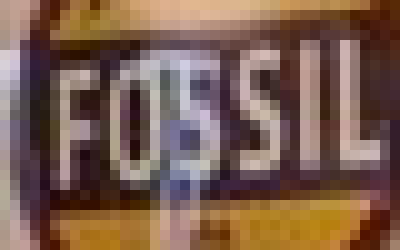

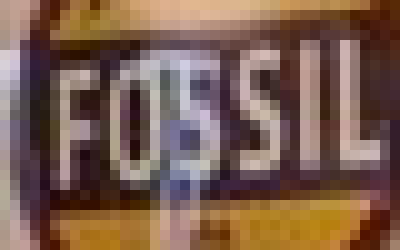

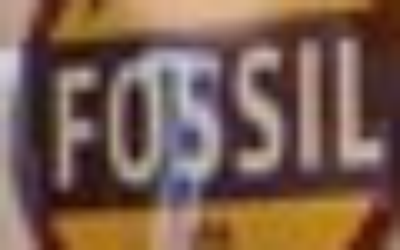

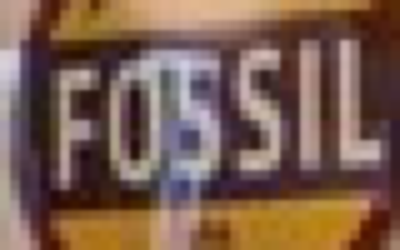

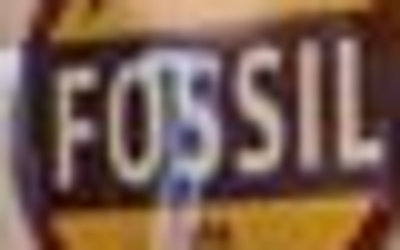

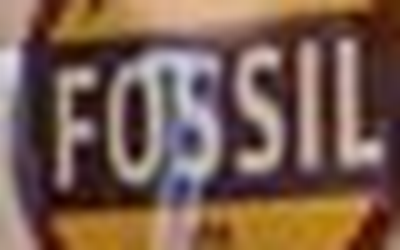

In [36]:
little_sign =image.crop((900, 420, 940, 445))

new_size = (little_sign.width*10,little_sign.height*10)

options=[Image.NEAREST, Image.BOX, Image.BILINEAR, Image.HAMMING, Image.BICUBIC, Image.LANCZOS]

# bicubic is the best

for option in options:
    display(little_sign.resize(new_size,option))

<PIL.Image.Image image mode=L size=400x250 at 0x7FADC49DC310>


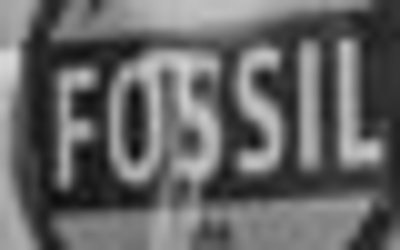

In [38]:
better_sign = little_sign.resize(new_size,Image.BICUBIC)
better_sign = better_sign.convert('L')
better_sign.save('data/resized.jpg')

In [35]:
img= Image.open('data/resized.jpg')

def binarize(image,threshold):
    final_image = image.copy()
    
    for x in range(final_image.width):
        for y in range(final_image.height):
            if final_image.getpixel((x,y)) < threshold:
                final_image.putpixel((x,y),0)
            else:
                final_image.putpixel((x,y),255)
                
    return final_image


for num in range(150,170):
    final_image = binarize(img,num)
    text_from_image = pytesseract.image_to_string(final_image)
    if text_from_image.strip() == 'FOSSIL':
        print('The correct threshold was',num)
        print(text_from_image)
        break



FOSSIL

The correct threshold was 152
FOSSIL

hello
